# Домашнее задание 1




## Задание 1

1. Реализовать функцию custom_rgb2hsb (перевод из RGB в HSV).
Формулы можно посмотреть, например, [здесь](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C)#RGB_%E2%86%92_HSV).

2. Преобразовать какое-нибудь изображение (например, кота из практики) в HSV вашей функцией и [skimage.color.rgb2hsv](https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.rgb2hsv). Совпадает ли результат? Если нет, то насколько сильно отличается?

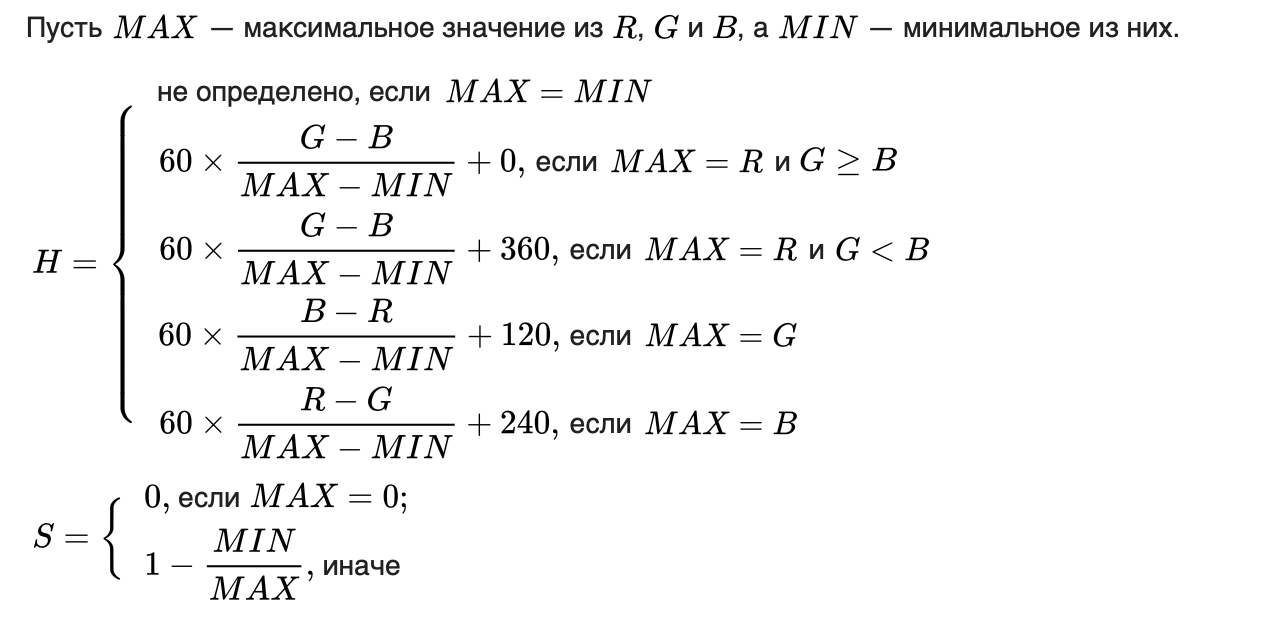

In [38]:
import skimage
import numpy as np
import matplotlib.pyplot as plt

def H(R,G,B):
    if max(R,G,B) == min(R,G,B):
        return 0
    
    if (max(R,G,B) == R) & (G >= B):
        return 60*(G-B)/(max(R,G,B)-min(R,G,B))
    
    if (max(R,G,B) == R) & (G < B):
        return 60*(G-B)/(max(R,G,B)-min(R,G,B))+360
    
    if max(R,G,B) == G:
        return 60*(B-R)/(max(R,G,B)-min(R,G,B))+120
    
    if max(R,G,B) == B:
        return 60*(R-G)/(max(R,G,B)-min(R,G,B))+240
    
def S(R,G,B):
    if max(R,G,B) == 0:
        return 0
    return 1 - min(R,G,B)/max(R,G,B)

def slow_custom_rgb2hsb(image):
    ans = image.copy().astype(float)
    for i, x in enumerate(image):
        for j, pix in enumerate(x):
            R,G,B = pix/255
            ans[i,j,0] = H(R,G,B)/360
            ans[i,j,1] = S(R,G,B)
            ans[i,j,2] = max(R,G,B)
    return ans

image = skimage.data.coffee()

(-0.5, 599.5, 399.5, -0.5)

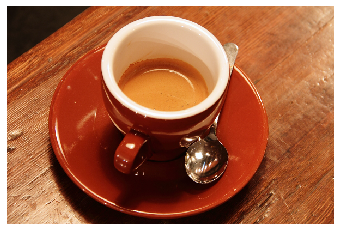

In [39]:
plt.imshow(image)
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

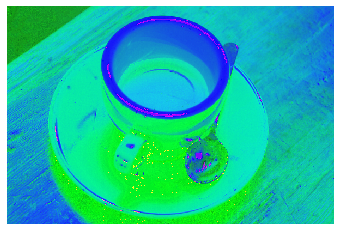

In [40]:
plt.imshow(rgb2hsv(image.copy()))
plt.axis('off')

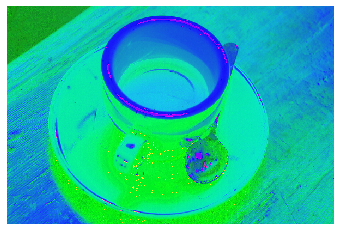

In [41]:
plt.imshow(slow_custom_rgb2hsb(image.copy()))
plt.axis('off');

## Задание 2

1. Реализовать [метод приведения гистограммы](https://en.wikipedia.org/wiki/Histogram_matching).
2. Пример работы на монохромных изображениях.
3. Пример работы на цветных изображениях в RGB (каналы обрабатываются независимо)
4. Пример работы на цветных изображениях в HSV (каналы обрабатываются независимо)
5. Можно ли использовать этот метод, чтобы "стилизовать" изображения?

In [181]:
import numpy as np
import skimage
from skimage.color import rgb2hsv

def hist_match(source, template):
    oldshape = source.shape
    source = source.ravel()
    template = template.ravel()
    s_values, bin_idx, s_counts = np.unique(source, return_inverse=True, return_counts=True)
    t_values, t_counts = np.unique(template, return_counts=True)
    s_quantiles = np.cumsum(s_counts).astype(np.float64)
    s_quantiles /= s_quantiles[-1]
    t_quantiles = np.cumsum(t_counts).astype(np.float64)
    t_quantiles /= t_quantiles[-1]
    interp_t_values = np.interp(s_quantiles, t_quantiles, t_values)
    return interp_t_values[bin_idx].reshape(oldshape)


def hist_match_pc(source, template):
    ans = source.copy()
    ans[:,:,0] = hist_match(source[:,:,0],template[:,:,0])
    ans[:,:,1] = hist_match(source[:,:,1],template[:,:,1])
    ans[:,:,2] = hist_match(source[:,:,2],template[:,:,2])
    return ans
    
source = skimage.data.camera()
template = skimage.data.coffee()


source_rgb = skimage.data.coffee()
template_rgb = skimage.data.chelsea()


(-0.5, 511.5, 511.5, -0.5)

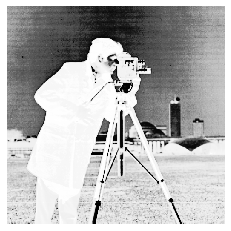

In [182]:
plt.imshow(hist_match(source.copy(), template.copy()), cmap='Greys')
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

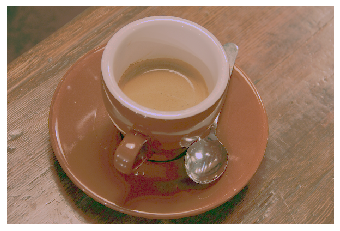

In [183]:
plt.imshow(hist_match_pc(source_rgb, template_rgb))
plt.axis('off')

(-0.5, 599.5, 399.5, -0.5)

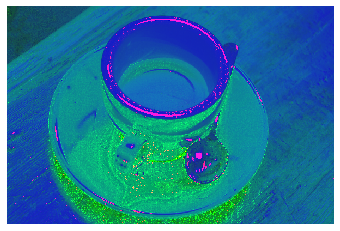

In [184]:
plt.imshow(hist_match_pc(rgb2hsv(source_rgb), rgb2hsv(template_rgb)))
plt.axis('off')

## Задание 3 (дополнительное/необязательное)

Это было последним заданием на практическом занятии.

Получите на тех же данных скор больше :)

Можно использовать 
* https://numpy.org/doc/stable/reference/index.html
* https://scikit-image.org/docs/stable/api/skimage.color.html
* простые (всё, кроме преобразований Хафа, Радона, пирамид лапласиан, гауссян) вещи из https://scikit-image.org/docs/stable/api/skimage.transform.html

Обратите внимание на описание данных:
`data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image. The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue. The image is stored in row-major order, so that the first 32 entries of the array are the red channel values of the first row of the image.`

In [3]:
# больше, чем это
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
!tar -xvzf cifar-10-python.tar.gz

# https://www.cs.toronto.edu/~kriz/cifar.html

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

Xs = []
ys = []
for f in ['cifar-10-batches-py/data_batch_1', 'cifar-10-batches-py/data_batch_2', 'cifar-10-batches-py/data_batch_3', 'cifar-10-batches-py/data_batch_4', 'cifar-10-batches-py/data_batch_5']:
  data = unpickle(f)
  Xs.append(data[b'data'])
  ys += data[b'labels']

X = np.vstack(Xs)
y = np.array(ys)

print(X.shape)
print(y.shape)

border_1, border_2 = 2000, 2500
X_train, X_test = X[:border_1], X[border_1:border_2]
y_train, y_test = y[:border_1], y[border_1:border_2] 
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(np.mean(y_pred == y_test))

--2020-09-09 16:50:20--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  31.2MB/s    in 5.9s    

2020-09-09 16:50:26 (27.8 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1
(50000, 3072)
(50000,)
0.25
